<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/INVENTARIO_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SISTEMA DE INVENTARIO**
El sistema de inventarios que se analiza es lote constante y tiempo entre pedidos variables. Las variables de decisión para este modelo son la cantidad a ordenar $q$ y el nivel de reorden $R$, las cuales minimizan los costos totales del inventario (costo de ordenar, costo de llevar inventario y costo de faltante). Por consiguiente, para evaluar el funcionamiento del sistema de acuerdo a los valores de las variables de decision utilizados, costos totales anules son acumulados.




Para resolver este problema es necesario primero calcular la demanda, la cual esta dada por una distribución de probabilidad empirica.

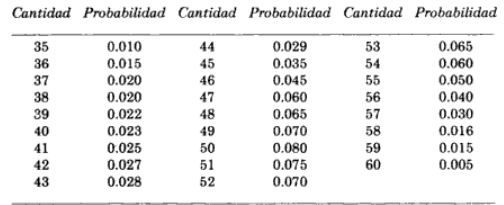

In [8]:
# prompt: Agregar una imagen

from IPython.display import Image

Image("demanda.png")

In [201]:
import random as rnd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [202]:
def demanda():
  p =[0,0.01,0.025,0.045,0.065, 0.087,0.11,0.135,0.162,0.19,0.219,0.254,0.299,0.359,0.424,0.494,0.574,0.649,0.719,0.784,0.844, 0.894,0.934,0.964,0.980,0.995,1]
  u=rnd.random()
  for i in range(len(p)):
      if p[i-1] <= u <= p[i]:
          x=i+34                          #Asigna valor de demanda dependiendo del intervalo que pertenezca
          break
  return x,u

En el problema nos están dando los factores estacionales, los cuales se refieren a las fluctuaciones o variaciones regulares que ocurren en una serie de datos a lo largo de períodos específicos del tiempo.

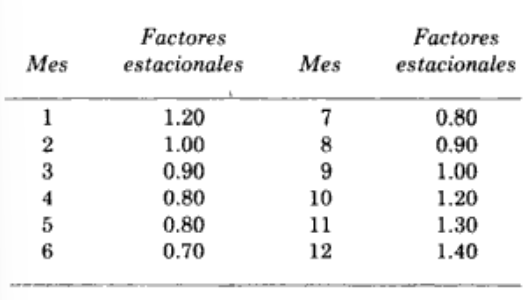

In [121]:
# prompt: Agregar una imagen

from IPython.display import Image

Image("FE.png")

Es por ello que deberemos actializar la demanda, es decir, habrá que multiplicarla por su respectivo factor de estacional.

In [203]:
def demanda_real(x,mes):              #Calcula la demanda real, de acuerdo a su factor estacional
  factor_mes=[1.2, 1, 0.9, 0.8, 0.8 ,0.7, 0.8, 0.9, 1, 1.2, 1.3, 1.4]
  for j in range(len(factor_mes)):
    if mes==j:                            #Ubica el mes
      x=round(x*factor_mes[j-1])          #multiplica por el factor
  return x

La información con respecto a los costos relevantes es la siguiente:


$$
Costo \ de \ ordenar = $100/orden \\
Costo \ de \ inventario = $20/unidad/año \\
Costo \ de \ faltante = $50/unidad
$$


El tiempo de entrega esta distribuido de acuerdo a la siguiente función de probabilidad

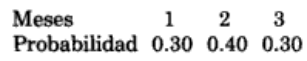

In [123]:
# prompt: Agregar una imagen

from IPython.display import Image

Image("ENTREGA.png")

En este caso, para simular el tiempo de entrega será necesario geenrar un numero aleatorio, idenficar en que intervalo se encuentra y asi, clasificar si se trata de 1, 2 o 3 meses de espera

In [204]:
def entrega(carga_pend, c_e):
  carga_pend=True                         #Indica que hay entrega pendiente
  v=rnd.random()
  if 0<= v < 0.3:                         #Identifica cual será el tiempo de entrega
    entrega=1
  elif 0.3 <= v < 0.7:
    entrega=2
  elif 0.7 <= v < 1:
    entrega=3
  c_e += 1
  return  entrega,carga_pend,c_e

El sistema de inventarios que se analiza es lote constante y tiempo entre pedidos variables. Las variables de decisión para este modelo son la cantidad a ordenar $q$ y el nivel de reorden $R$, las cuales minimizan los costos totales del inventario (costo de ordenar, costo de llevar inventario y costo de faltante).

El problema nos pide asumir el inventario inicial en 150 unidades, también debemos considerar que no haya cargas pendientes y inicializar el tiempo de entrega en cero para después calcularlo.
Utilizamos un contador para recibir la entrega, la cual inica en -1 para comenzar desde la iteración siguiente.

In [218]:
inv_inicial=150
inventario_i=[150]                          #Guarda inventario inicial en una lista
inv_falt=0
carga_pend=False                            #Indica que no hay carga pendiente
t=0                                 #No hay tiempo de entrega
cont=-1                                     #Contador para recibir la entrega (inicia en -1 para comenzar a contar desde la sig. iteracion)
faltante=0                                  #Demanda faltante
data=[]                                     #Lista para imprimir tabla
cont_ent=0
q=200
R=100
ciclo = 12
for m in range(ciclo):                         #Ciclo de 12 meses
  mes=m+1
  dem,val=demanda()                         #Calcula demanda y número aleatorio generado para el mes correspondiente
  dem_ajus=demanda_real(dem,mes)        #Calcula demanda ajustada

  inv_final=inv_inicial-dem_ajus            #Calcula demanda final
  inv_men_prom=(inv_inicial+dem_ajus)/2     #Calcula demanda promedio mensual



  if inv_final<=R and carga_pend==False:    #Condición: Se pasó el punto de reorden y no hay carga pendiente
    t,carga_pend,cont_ent=entrega(carga_pend,cont_ent)  #Calucla tiempo de entrega

  if carga_pend==True:                        #Contador para recibir la entrega aumenta en 1
    cont+=1

  if inv_final<0:                             #Si el inventario final es negativo, se imprime "-"
    faltante=abs(inv_final)
    data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", "-",f"{faltante}",f"{t}",f"{np.round(inv_inicial**2/(2*dem_ajus))}"])
    inv_falt+=faltante
  else:
    data.append([f"{mes}",f"{inv_inicial}", f"{val}", f"{dem}",f"{dem_ajus}", f"{inv_final}",f"{faltante}",f"{t}",f"{np.round(inv_men_prom)}"])

  inv_inicial=inv_final                       #Inventario final pasa a ser inventario incial en el siguiente mes

  if cont==t:                         #Condición: Se cumple tiempo de entrega
    cont=-1                                   #Reinicia contador
    inv_inicial+=q                          #Aumenta el inventario +200
    carga_pend=False                          #Indica que ya no hay carga pendiente
    t=0                               #Reinicia tiempo de entrega

  faltante=0                                  #Reinicia inv. faltante
  inventario_i.append(inv_inicial)            #Guarda inventario inicial en una lista

#Imprime tabla
headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda real' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
tab = tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False, colalign=("center",)*len(headers))
print(tab)

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│  Mes  │  Inventario inicial  │  No. aleatorio  │  Demanda  │  Demanda real  │  Inventario final  │  Faltante  │  Entrega  │  Inventario mensual promedio  │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│   1   │         150          │    0.660641     │    52     │       62       │         88         │     0      │     1     │              106              │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│   2   │          88          │     0.59235     │    51     │       51       │         37         │     0      │     1     │              70               │
├───────┼──────────────────────┼─────────────────┼──

Ahora, dado que estamos hablando de un problema de simualcion, definiremos lo anterior como una función, para poder agregar el R y Q correspondientes

In [219]:
#Asigna valores iniciales
def simulacion(Q,R):
    inv_inicial = 150
    inventario_i = [150]
    inv_falt = 0
    carga_pend = False
    t = 0
    cont = -1
    faltante = 0
    data = []
    c_e = 0

    for m in range(12):
        mes = m + 1
        dem, val = demanda()
        dem_ajus = demanda_real(dem, mes)
        inv_final = inv_inicial - dem_ajus
        inv_men_prom = (inv_inicial + dem_ajus) / 2

        if inv_final <= R and not carga_pend:
            t, carga_pend, c_e = entrega(carga_pend, c_e)

        if carga_pend:
            cont += 1

        if inv_final < 0:
            faltante = abs(inv_final)
            data.append([f"{mes}", f"{inv_inicial}", f"{val}", f"{dem}", f"{dem_ajus}", "-", f"{faltante}", f"{t}", f"{np.round(inv_inicial**2 / (2 * dem_ajus))}"])
            inv_falt += faltante
        else:
            data.append([f"{mes}", f"{inv_inicial}", f"{val}", f"{dem}", f"{dem_ajus}", f"{inv_final}", f"{faltante}", f"{t}", f"{np.round(inv_men_prom)}"])

        inv_inicial = inv_final

        if cont == t:
            cont = -1
            inv_inicial += q
            carga_pend = False
            t = 0

        faltante = 0
        inventario_i.append(inv_inicial)

    suma_inv_prom = sum(float(fila[-1]) for fila in data)
    costo_total = c_e * R + suma_inv_prom * 1.67 + inv_falt * 50
    return costo_total, data, inventario_i, c_e, suma_inv_prom, inv_falt

Acomodamos los datos en una tabla y los costos

In [220]:
# Prueba inicial con valores de q y R
costo_total, data, inventario_i, c_e, suma_inv_prom, inv_falt = simulacion(200, 100)

In [221]:
#Imprime tabla
headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda real' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
tab = tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False, colalign=("center",)*len(headers))
print(tab)

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│  Mes  │  Inventario inicial  │  No. aleatorio  │  Demanda  │  Demanda real  │  Inventario final  │  Faltante  │  Entrega  │  Inventario mensual promedio  │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│   1   │         150          │    0.102414     │    40     │       48       │        102         │     0      │     0     │              99               │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│   2   │         102          │    0.710726     │    52     │       52       │         50         │     0      │     3     │              77               │
├───────┼──────────────────────┼─────────────────┼──

In [222]:
costo = [c_e * 100, suma_inv_prom * 1.67, inv_falt * 50, costo_total]
headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total']
tab = tabulate([costo], headers=headers, tablefmt="fancy_grid", showindex=False,colalign=("center",)*len(headers))
print(tab)

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│  Costo de ordenar  │  Costo de llevar el inventario  │  Costo de faltante  │  Costo total  │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│        300         │             1315.96             │        5650         │    7265.96    │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛


Ahora, siempre es importante mostrar la gráfica

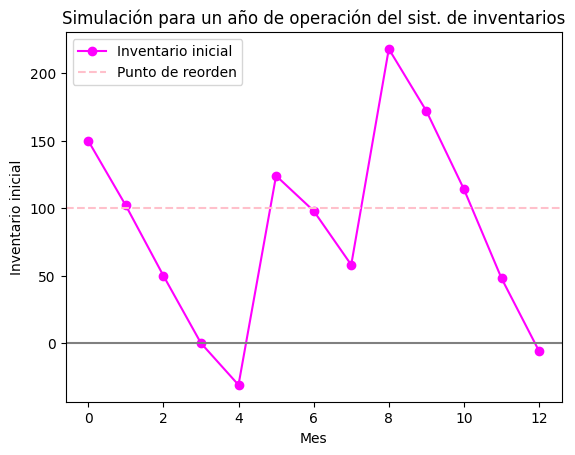

In [223]:
#Imprime gráfica
plt.plot(inventario_i, marker='o', label="Inventario inicial", color ='magenta')
plt.title('Simulación para un año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="pink",linestyle='--', label='Punto de reorden')
plt.axhline(0, color='gray')
plt.legend()
plt.show()

# **OPTIMIZACION**

En la lectura se nos habla sobre un método de optimización, Hooke.Geeves.
El método de Hooke-Jeeves, también conocido como el método de patrón de búsqueda, es un algoritmo de optimización sin derivadas que busca minimizar una función objetivo. Fue desarrollado por Robert Hooke y T.A. Jeeves en 1961. Este método es particularmente útil para problemas donde la función objetivo no es diferenciable, es ruidosa, o se desconoce su forma analítica.


1.   Definimos un punto inicial y el criterio de convergencia, es decir, un numero minimo de iteraciones o una tolerancia minima
2.   Evaluamos la función objetivo, esta se calculó anteriormente cuando se obtuvo el costo total.
3. Actualizamos los pasos, si no se encuentra una mejora, reducirmos los tamaños de los pasos.
4. si se encuentra una mejora, se continua con los pasos.
5. El algoritmo se detiene cuando los cambios en Q y R son menores que un valor predefinido.



In [239]:
def hooke_jeeves(f, Q0, R0, delta_Q, delta_R, tol, max_iter):
    Q, R = Q0, R0
    iter_count = 0

    while iter_count < max_iter:
        # Búsqueda
        improved = False
        for dQ in [-delta_Q, 0, delta_Q]:
            for dR in [-delta_R, 0, delta_R]:
                if dQ == 0 and dR == 0:
                    continue
                Q_new, R_new = Q + dQ, R + dR
                if f(Q_new, R_new) < f(Q, R):
                    Q, R = Q_new, R_new
                    improved = True

        # Si no hay mejora, reducir los pasos
        if not improved:
            delta_Q /= 2
            delta_R /= 2

        # Criterio de Parada
        if delta_Q < tol and delta_R < tol:
            break

        iter_count += 1

    return Q, R

In [240]:
Q_OP,R_OP = hooke_jeeves(simulacion, 200, 100, 10, 10, 0.001, 100)
print(f"Q_OP = {Q_OP}, R_OP = {R_OP}")

Q_OP = 250, R_OP = 120


In [241]:
costo_total, data, inventario_i, c_e, suma_inv_prom, inv_falt = simulacion(Q_OP, R_OP)

In [242]:
#Imprime tabla
headers = ['Mes', 'Inventario inicial' ,'No. aleatorio' ,'Demanda' ,'Demanda real' , 'Inventario final','Faltante', 'Entrega', 'Inventario mensual promedio']
tab = tabulate(data, headers=headers, tablefmt="fancy_grid",showindex=False, colalign=("center",)*len(headers))
print(tab)

╒═══════╤══════════════════════╤═════════════════╤═══════════╤════════════════╤════════════════════╤════════════╤═══════════╤═══════════════════════════════╕
│  Mes  │  Inventario inicial  │  No. aleatorio  │  Demanda  │  Demanda real  │  Inventario final  │  Faltante  │  Entrega  │  Inventario mensual promedio  │
╞═══════╪══════════════════════╪═════════════════╪═══════════╪════════════════╪════════════════════╪════════════╪═══════════╪═══════════════════════════════╡
│   1   │         150          │     0.41499     │    48     │       58       │         92         │     0      │     3     │              104              │
├───────┼──────────────────────┼─────────────────┼───────────┼────────────────┼────────────────────┼────────────┼───────────┼───────────────────────────────┤
│   2   │          92          │    0.488461     │    49     │       49       │         43         │     0      │     3     │              70               │
├───────┼──────────────────────┼─────────────────┼──

In [243]:
costo = [c_e * 100, suma_inv_prom * 1.67, inv_falt * 50, costo_total]
# Center the data in the table
headers=['Costo de ordenar', 'Costo de llevar el inventario', 'Costo de faltante', 'Costo total']
tab = tabulate([costo], headers=headers, tablefmt="fancy_grid", showindex=False,colalign=("center",)*len(headers))
print(tab)

╒════════════════════╤═════════════════════════════════╤═════════════════════╤═══════════════╕
│  Costo de ordenar  │  Costo de llevar el inventario  │  Costo de faltante  │  Costo total  │
╞════════════════════╪═════════════════════════════════╪═════════════════════╪═══════════════╡
│        300         │             1309.28             │        3200         │    4869.28    │
╘════════════════════╧═════════════════════════════════╧═════════════════════╧═══════════════╛


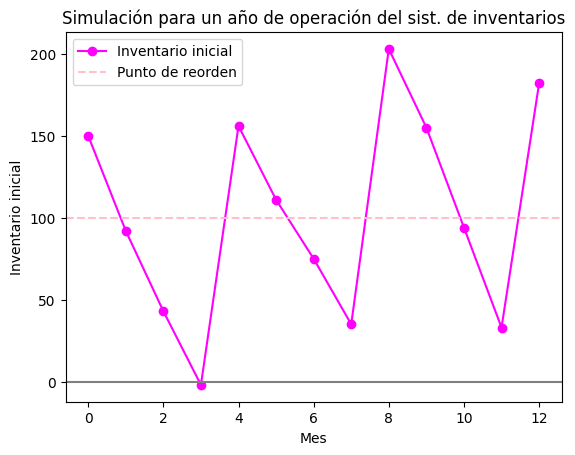

In [244]:
#Imprime gráfica
plt.plot(inventario_i, marker='o', label="Inventario inicial", color ='magenta')
plt.title('Simulación para un año de operación del sist. de inventarios')
plt.xlabel('Mes')
plt.ylabel('Inventario inicial')
plt.axhline(100, color="pink",linestyle='--', label='Punto de reorden')
plt.axhline(0, color='gray')
plt.legend()
plt.show()

Nos damos cuenta que nuestro codigo funciona ya que nuestro costo total se reduce